### 1. 목표
- 타이타닉 데이터를 활용하여 생존자 예측 모델을 만들어보자!
- kaggle 경진대회에서 높은 점수를 달성해보자~
- 머신러닝의 전체과정을 이해해보자!

### 2. 데이터 수집
- kaggle 에서 제공해주는 데이터 불러오기

In [334]:
# 라이브러리 불러오기 
import pandas as pd # 수치계산용 라이브러리 #  Numerical
import numpy as np # 행과 열을 가지는 표와 같은 형태를 다루는 라이브러리
import matplotlib.pyplot as plt # 시각화 라이브러리
import seaborn as sns # 시각화 라이브러리 -> pandas 호환성dl 높은 라이브러리
# 색감다양, 다양한 그래프를 출력해볼 수 있음

In [335]:
a = [1,2,3,4]
a + a # [1, 2, 3, 4, 1, 2, 3, 4]

[1, 2, 3, 4, 1, 2, 3, 4]

In [336]:
arr_a = np.array(a)
arr_a + arr_a #array([2, 4, 6, 8])
# 넘파이 배열은 요소별 연산이 가능하다 (자: 스칼라 연산 가능 전체 곱하기 10)

array([2, 4, 6, 8])

In [337]:
# train, test
# 조건 : Passenger ID 컬럼을 인덱스로 변경하여 불러오기!train = pd.read_csv('data/train.csv', index_col='PassengerId')

train = pd.read_csv('data/train.csv', index_col='PassengerId')
test = pd.read_csv('data/test.csv', index_col='PassengerId')
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [338]:
# 데이터 크기 확인
print(train.shape, test.shape)
#(891, 11) (418, 10)
# train: 10개 특성, 1개의 정답
# test : 10개 특성

(891, 11) (418, 10)


In [339]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [340]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### 3. 데이터 전처리

##### 결측치 여부 확인
- train
    - Age
    - Cabin
    - Embarked
- test
    - Age
    - Fare
    - Cabin
- 단순 기술통계량으로 결측치를 채우지 않고 각 컬럼간의 상관관계를 파악하여 채워보자!

In [341]:
# train 정보확인
train.info()

# 결측치
# 데이터타입

# <class 'pandas.core.frame.DataFrame'>
# Index: 891 entries, 1 to 891
# Data columns (total 11 columns):
#  #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   Survived  891 non-null    int64  
#  1   Pclass    891 non-null    int64  
#  2   Name      891 non-null    object 
#  3   Sex       891 non-null    object 
#  4   Age       714 non-null    float64
#  5   SibSp     891 non-null    int64  
#  6   Parch     891 non-null    int64  
#  7   Ticket    891 non-null    object 
#  8   Fare      891 non-null    float64
#  9   Cabin     204 non-null    object 
#  10  Embarked  889 non-null    object 
# dtypes: float64(2), int64(4), object(5)
# memory usage: 83.5+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [342]:
#자영
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


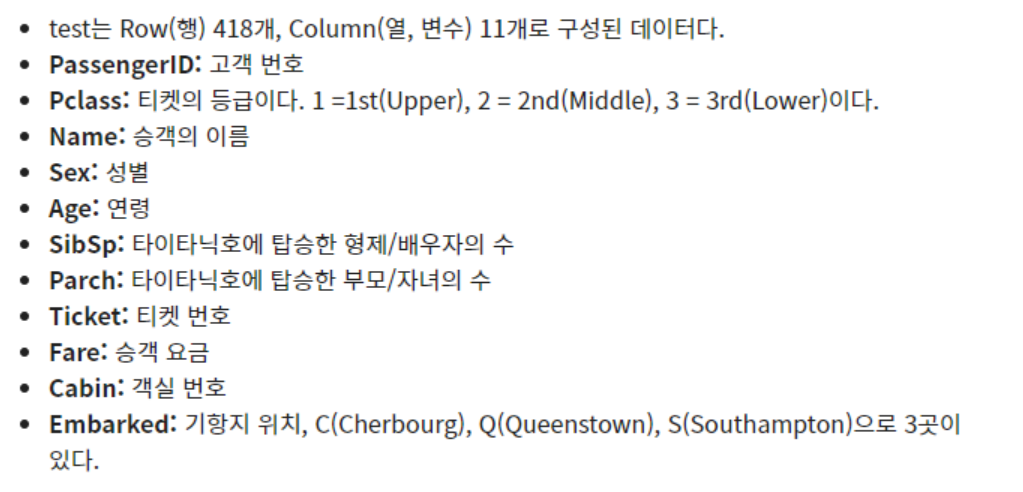

- train -> Age 결측치 채우기!
    - 나이 데이터는 주로 평균값으로 결측치를 채움
    - 기술통계량을 확인해봤을 때 전체적인 나이가 앞쪽으로 치우쳐져 있는 것을 확인
    (모델의 신뢰성이 낮아질 수 있음)
    - 다른 컬럼들과의 상관관계를 확인하여 결측치를 상세하게 채워보자!
    

In [343]:
#자:train의 Age컬럼의 평균
train['Age'].mean() # 29.69911764705882


29.69911764705882

In [344]:
# 나이 데이터의 기술통계량 확인
train['Age'].describe()

# count    714.000000
# mean      29.699118
# std       14.526497
# min        0.420000
# 25%       20.125000
# 50%       28.000000
# 75%       38.000000
# max       80.000000
# Name: Age, dtype: float64

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

- 절댓값으로 1에 가까울수록 상관관계가 높다
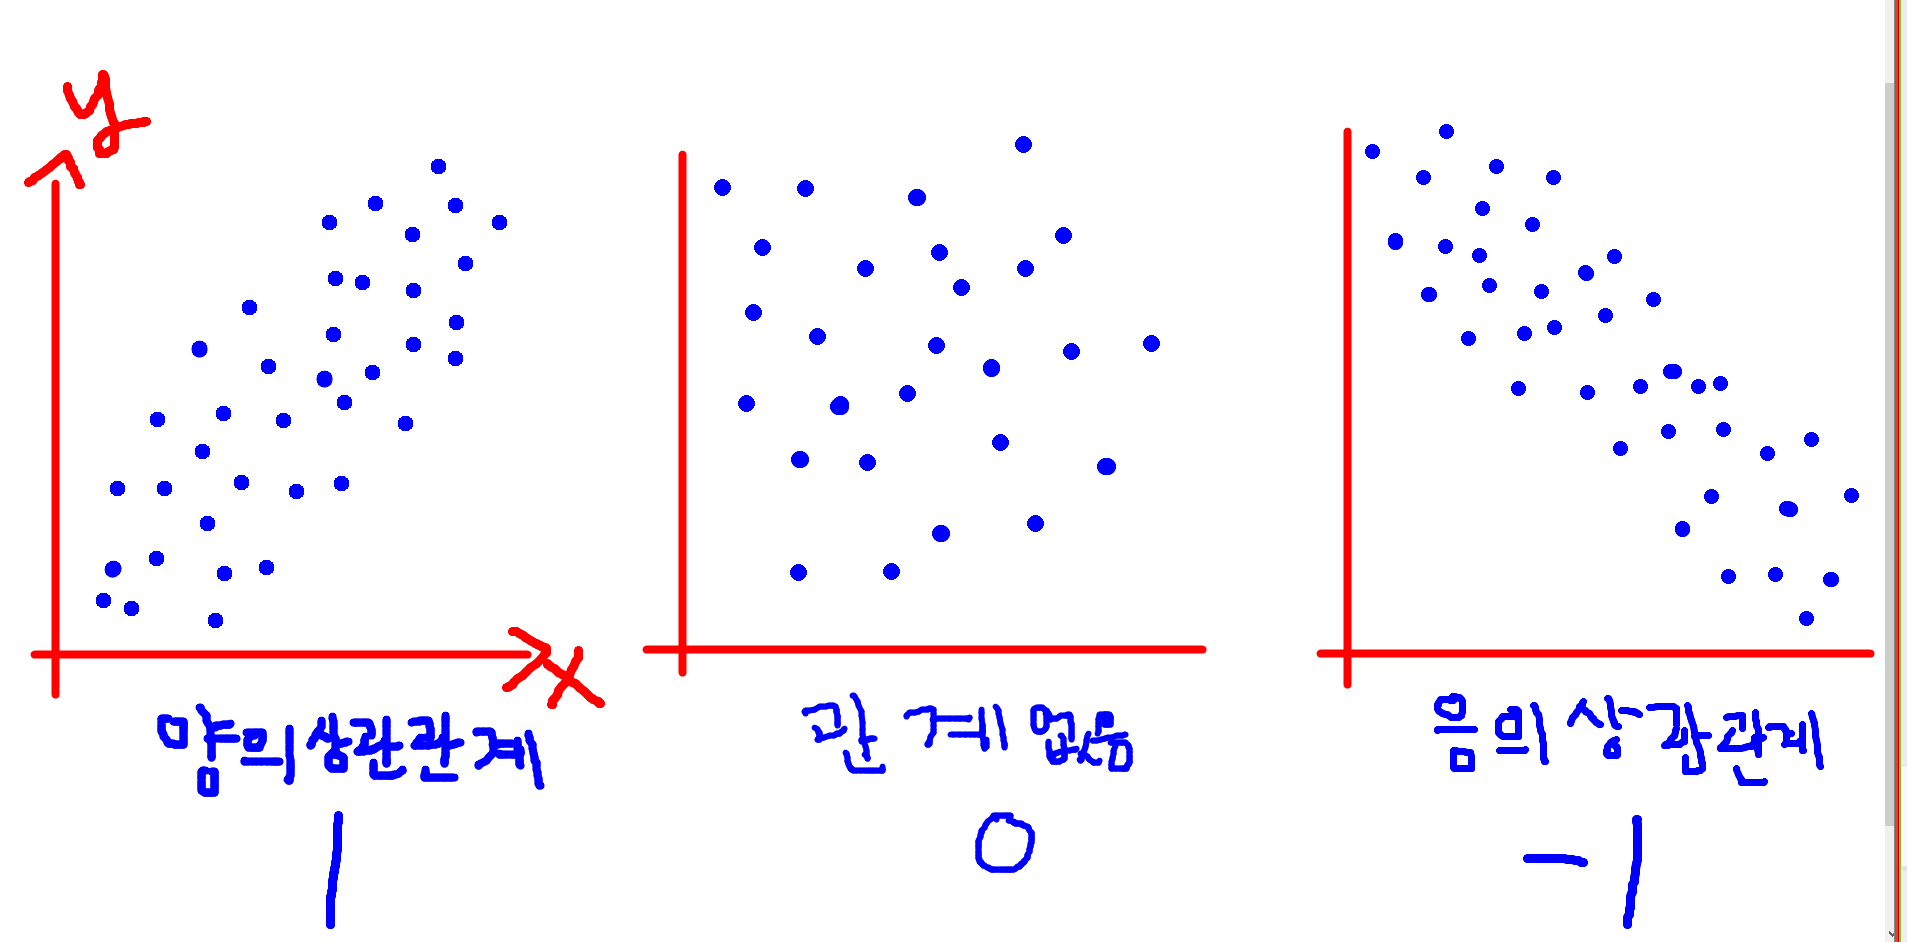

In [345]:
train.corr(numeric_only=True)
# -1 ~ 1 사이의 값을 가지며 
# 절댓값으로! 1에 가까울수록 높은 상관관계를 가진다
# 0에 가까울수록 관계가 없음을 의미

# Age 컬럼과 상관관계가 높은 Pclass 컬럼을 활용

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [346]:
# 피봇테이블 -> 컬럼들 간의 요약된 정보를 출력할 수 있는 테이블 형태의 데이터
# Age 평균값을 구할건데, Pclass, Sex에 따른 평균값
pt1 = train.pivot_table(values='Age', # 데이터로 사용될 컬럼
                 index = ['Pclass', 'Sex'], # 데이터 요약 사용할 컬럼
                 aggfunc='mean') # 그룹별로 조화할 함수 (sum, mean, count)
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [347]:
# 다중인덱싱/멀티인덱싱 -> 두 개 이상의 인덱스가 있을 때 값 가져오는 방법
# df.loc[(앞인덱스, 뒤인덱스), (자:가져오고싶은)컬럼명]

# 1등급 여자의 나이
pt1.loc[(1,'female'), 'Age'] #34.61176470588235

34.61176470588235

In [348]:
# 실습 (자영풀이)
# 2등급 남자의 나이
pt1.loc[(2, 'male'), 'Age'] # 30.74070707070707

30.74070707070707

In [349]:
# 3등급 여자의 나이
pt1.loc[(3, 'female'), 'Age'] # 21.75

21.75

In [350]:
# 나이 결측치를 출력해주는 기능 함수화
def fill_age (data):
    if pd.isna(data['Age']): # Age 컬럼에 결측치가 있다면?
        return pt1.loc[(data['Pclass'], data['Sex']), 'Age'] # Pclass, Sex 맞는 나이값 출력
    else: # 결측치가 없다면?
        return data['Age'] # 원래 Age 컬럼에 있는 값을 출력
        

In [351]:
# apply 함수 : DataFrame에 함수를 적용하기 위해 사용함 (자: 행단위?열단위? 결정)
# DataFrame.apply(함수명, 축설정)

In [352]:
# train의 Age 컬럼에 위의 함수를 통해 출력된 값으로 업데이트
train['Age'] = train.apply(fill_age, axis=1).astype('int64')

In [353]:
train.info()
# <class 'pandas.core.frame.DataFrame'>
# Index: 891 entries, 1 to 891
# Data columns (total 11 columns):
#  #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   Survived  891 non-null    int64  
#  1   Pclass    891 non-null    int64  
#  2   Name      891 non-null    object 
#  3   Sex       891 non-null    object 
#  4   Age       891 non-null    int64  
#  5   SibSp     891 non-null    int64  
#  6   Parch     891 non-null    int64  
#  7   Ticket    891 non-null    object 
#  8   Fare      891 non-null    float64
#  9   Cabin     204 non-null    object 
#  10  Embarked  889 non-null    object 
# dtypes: float64(1), int64(5), object(5)
# memory usage: 83.5+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


- test ->Age 컬럼 결측치 채우기

In [354]:
# # test 데이터 채우기
# # 자영 실습

# # 1. 상관관계 파악
# test.corr(numeric_only=True)


# # 2. 피봇테이블 만들기
# pt21 = test.pivot_table(values='Age', # 데이터로 사용될 컬럼
#                  index = ['Pclass', 'Sex'], # 데이터 요약 사용할 컬럼
#                  aggfunc='mean') # 그룹별로 조화할 함수 (sum, mean, count)
# pt21

# # 3. 나이 출력 함수 만들기
# def fill_age21 (data):
#     if pd.isna(data['Age']): # Age 컬럼에 결측치가 있다면?
#         return pt21.loc[(data['Pclass'], data['Sex']), 'Age'] # Pclass, Sex 맞는 나이값 출력
#     else: # 결측치가 없다면?
#         return data['Age'] # 원래 Age 컬럼에 있는 값을 출력

# # 4. test data에 적용
# test['Age'] = test.apply(fill_age21, axis=1).astype('int64')
# test.info()

In [355]:
# test 데이터 채우기
# 쌤풀이
test['Age'] = test.apply(fill_age, axis = 1).astype('int64')

In [356]:
test.info()
#<class 'pandas.core.frame.DataFrame'>
# Index: 418 entries, 892 to 1309
# Data columns (total 10 columns):
#  #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   Pclass    418 non-null    int64  
#  1   Name      418 non-null    object 
#  2   Sex       418 non-null    object 
#  3   Age       418 non-null    int64  
#  4   SibSp     418 non-null    int64  
#  5   Parch     418 non-null    int64  
#  6   Ticket    418 non-null    object 
#  7   Fare      417 non-null    float64
#  8   Cabin     91 non-null     object 
#  9   Embarked  418 non-null    object 
# dtypes: float64(1), int64(4), object(5)
# memory usage: 35.9+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


- Embarked

In [357]:
train.info()
# train Embarked 컬럼의 결측치는 단 2개

# <class 'pandas.core.frame.DataFrame'>
# Index: 891 entries, 1 to 891
# Data columns (total 11 columns):
#  #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   Survived  891 non-null    int64  
#  1   Pclass    891 non-null    int64  
#  2   Name      891 non-null    object 
#  3   Sex       891 non-null    object 
#  4   Age       891 non-null    int64  
#  5   SibSp     891 non-null    int64  
#  6   Parch     891 non-null    int64  
#  7   Ticket    891 non-null    object 
#  8   Fare      891 non-null    float64
#  9   Cabin     204 non-null    object 
#  10  Embarked  889 non-null    object 
# dtypes: float64(1), int64(5), object(5)
# memory usage: 83.5+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [358]:
train['Embarked'].unique()
#array(['S', 'C', 'Q', nan], dtype=object)

array(['S', 'C', 'Q', nan], dtype=object)

In [359]:
train['Embarked'].count() # 889 #자:count는 값이 있는 데이터의 개수

889

In [360]:
train['Embarked'].value_counts()
# 결측치가 2개 뿐이고 S 데이터가 압도적으로 많기 때문에
# 결측치 S 항구로 채워주기
# 데이터가 많으면 많을수록 한 두개의 데이터는 큰 영향을 끼치지 않음

# Embarked
# S    644
# C    168
# Q     77
# Name: count, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [361]:
# test 데이터도 확인
test['Embarked'].value_counts()

# Embarked
# S    270
# C    102
# Q     46
# Name: count, dtype: int64

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [362]:
# 결측치를 내가 원하느 값으로 채워주는 함수
# 채워주고 싶은 df.fillna(값)
train['Embarked'] = train['Embarked'].fillna('S')

In [363]:
train.info()
# Embarked 컬럼 결측치 채우기 완료~

# <class 'pandas.core.frame.DataFrame'>
# Index: 891 entries, 1 to 891
# Data columns (total 11 columns):
#  #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   Survived  891 non-null    int64  
#  1   Pclass    891 non-null    int64  
#  2   Name      891 non-null    object 
#  3   Sex       891 non-null    object 
#  4   Age       891 non-null    int64  
#  5   SibSp     891 non-null    int64  
#  6   Parch     891 non-null    int64  
#  7   Ticket    891 non-null    object 
#  8   Fare      891 non-null    float64
#  9   Cabin     204 non-null    object 
#  10  Embarked  891 non-null    object 
# dtypes: float64(1), int64(5), object(5)
# memory usage: 83.5+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


- test->Fare 요금 결측치 채우기

In [364]:
test.info()
# <class 'pandas.core.frame.DataFrame'>
# Index: 418 entries, 892 to 1309
# Data columns (total 10 columns):
#  #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   Pclass    418 non-null    int64  
#  1   Name      418 non-null    object 
#  2   Sex       418 non-null    object 
#  3   Age       418 non-null    int64  
#  4   SibSp     418 non-null    int64  
#  5   Parch     418 non-null    int64  
#  6   Ticket    418 non-null    object 
#  7   Fare      417 non-null    float64
#  8   Cabin     91 non-null     object 
#  9   Embarked  418 non-null    object 
# dtypes: float64(1), int64(4), object(5)
# memory usage: 35.9+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [365]:
test['Fare'].describe()

# 평균 35 최댓값 512 앞쪽에 몰려있는 것을 확인
# Fare 전체 평균으로 채우기에는 신뢰성이 떨어질 것 같음

#count    417.000000
# mean      35.627188
# std       55.907576
# min        0.000000
# 25%        7.895800
# 50%       14.454200
# 75%       31.500000
# max      512.329200
# Name: Fare, dtype: float64

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [366]:
# Fare 컬럼 상관관계 확인
train.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [367]:
# Fare 컬럼과 관련 높은 Pcalss, sex 가져와서 결측치 채우기!
# 피봇테이블
# Fare 평균값 (Pclass, Sex에 따른) -> pt2

pt2 = test.pivot_table(values='Fare',
               index=['Pclass','Sex'],
                aggfunc = 'mean')
pt2

Fare
Pclass Sex               
1      female  115.591168
       male     75.586551
2      female   26.438750
       male     20.184654
3      female   13.735129
       male     11.826350

In [368]:
# 비어있는 값이 1개이기 때문에 함수 생성x 
# test 에서 결측치 있는 행을 찾아서 직접 넣어주자!
# test 에서 Fare 컬럼이 비어있는 행 찾아오기!
# 불리언 인덱싱 : 조건에 맞는 데이터만 추출
# 데이터[조건] -> 조건이 True 값만 추출

# 비어있는 값 확인 : isna()

# 자: 실습1
#자영풀이
# test['Fare'][test['Fare'].isna()]
# PassengerId
# 1044   NaN
# Name: Fare, dtype: float64

#쌤풀이 
test[test['Fare'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [369]:
# 3등급 이면서 남자의 요금 평균 : 11.826350
# Fare에 결측치에 채워주기

test['Fare'] = test['Fare'].fillna(11.826350)

In [370]:
test.info()

# <class 'pandas.core.frame.DataFrame'>
# Index: 418 entries, 892 to 1309
# Data columns (total 10 columns):
#  #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   Pclass    418 non-null    int64  
#  1   Name      418 non-null    object 
#  2   Sex       418 non-null    object 
#  3   Age       418 non-null    int64  
#  4   SibSp     418 non-null    int64  
#  5   Parch     418 non-null    int64  
#  6   Ticket    418 non-null    object 
#  7   Fare      418 non-null    float64
#  8   Cabin     91 non-null     object 
#  9   Embarked  418 non-null    object 
# dtypes: float64(1), int64(4), object(5)
# memory usage: 35.9+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### 불리언 인덱싱 복습

In [371]:
# 자: 실습2
# 나이가 50세 이상인 데이터 출력
# 자영풀이
test[test['Age']>=50]

# 쌤풀이
test[test['Age'] >=50]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.68750,NaN,Q
905,2,"Howard, Mr. Benjamin",male,63,1,0,24065,26.00000,NaN,S
912,1,"Rothschild, Mr. Martin",male,55,1,0,PC 17603,59.40000,NaN,C
917,3,"Robins, Mr. Alexander A",male,50,1,0,A/5. 3337,14.50000,NaN,S
922,2,"Louch, Mr. Charles Alexander",male,50,1,0,SC/AH 3085,26.00000,NaN,S
940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60,0,0,11813,76.29170,D15,C
961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60,1,4,19950,263.00000,C23 C25 C27,S
969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55,2,0,11770,25.70000,C101,S
973,1,"Straus, Mr. Isidor",male,67,1,0,PC 17483,221.77920,C55 C57,S


In [372]:
# 자:실습3
# 성별이 여자인 사람만 출력
# 자영풀이
test[test['Sex']=='female']

# 쌤풀이
test[test['Sex']=='female']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S
898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,NaN,Q
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,NaN,C
904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S
...,...,...,...,...,...,...,...,...,...,...
1301,3,"Peacock, Miss. Treasteall",female,3,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1302,3,"Naughton, Miss. Hannah",female,21,0,0,365237,7.7500,NaN,Q
1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37,1,0,19928,90.0000,C78,Q


In [373]:
score = [70,56,21,80,90,95] #자: 그냥 list
score[3] #80

np_score = np.array(score) #자: 불리언 인덱싱은 numpy에서만 가능
np_score
#array([70, 56, 21, 80, 90, 95])

array([70, 56, 21, 80, 90, 95])

In [374]:
# 점수가 80점 이상인 데이터만 출력
np_score[np_score >= 80] # 불리언 인덱싱은 numpy에서만 가능
# array([80, 90, 95])

array([80, 90, 95])

- Cabin 결측치 처리 (train, test 둘 다 결측치가 있다)

In [375]:
train['Cabin'].count() # 204
# 전체데이터 891개
# 있는 데이터 204개
# 결측치 687개
# 실제 데이터보다 결측치가 더 많음 -> 컬럼을 삭제하는 것도 하나의 방법

204

In [376]:
train['Cabin'].unique()
# 유일한 값들을 확인해봤을 때 규칙을 찾기!
# 알파벳을 활용해보자! -> 층수

#array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
#        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
#        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
#        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
#        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
#        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
#        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
#        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
#        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
#        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
#        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
#        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
#        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
#        'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
#        'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
#        'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
#        'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
#        'C148'], dtype=object)


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [377]:
# train, test 알파벳으로 데이터를 변경
# 결측치가 있는 데이터들에는 'M'이라는 임의의 알파벳으로 채워주고 가자
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')
# 임의의 문자로 채워주는 이유는 결측치가 너무 많기 때문에 
# 결측치를 가지고 있는 사람들의 패턴을 파탁하기 위해
# 시각화를 통해서 결측치즐의 규칙 확인 

In [378]:
# 'Deck' 컬럼에는 알파벳만을 담아주기~ (첫번째 문자열만 추출)
train['Deck'] = train['Deck'].str[0]


# PassengerId
# 1      M
# 2      C
# 3      M
# 4      C
# 5      M
#       ..
# 887    M
# 888    B
# 889    M
# 890    C
# 891    M
# Name: Deck, Length: 891, dtype: object


test['Deck'] = test['Deck'].str[0]
# PassengerId
# 892     M
# 893     M
# 894     M
# 895     M
# 896     M
#        ..
# 1305    M
# 1306    C
# 1307    M
# 1308    M
# 1309    M
# Name: Deck, Length: 418, dtype: object

In [379]:
train.info()
# <class 'pandas.core.frame.DataFrame'>
# Index: 891 entries, 1 to 891
# Data columns (total 12 columns):
#  #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   Survived  891 non-null    int64  
#  1   Pclass    891 non-null    int64  
#  2   Name      891 non-null    object 
#  3   Sex       891 non-null    object 
#  4   Age       891 non-null    int64  
#  5   SibSp     891 non-null    int64  
#  6   Parch     891 non-null    int64  
#  7   Ticket    891 non-null    object 
#  8   Fare      891 non-null    float64
#  9   Cabin     204 non-null    object 
#  10  Embarked  891 non-null    object 
#  11  Deck      891 non-null    object 
# dtypes: float64(1), int64(5), object(6)
# memory usage: 122.8+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


In [380]:
test.info()
# <class 'pandas.core.frame.DataFrame'>
# Index: 418 entries, 892 to 1309
# Data columns (total 11 columns):
#  #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   Pclass    418 non-null    int64  
#  1   Name      418 non-null    object 
#  2   Sex       418 non-null    object 
#  3   Age       418 non-null    int64  
#  4   SibSp     418 non-null    int64  
#  5   Parch     418 non-null    int64  
#  6   Ticket    418 non-null    object 
#  7   Fare      418 non-null    float64
#  8   Cabin     91 non-null     object 
#  9   Embarked  418 non-null    object 
#  10  Deck      418 non-null    object 
# dtypes: float64(1), int64(4), object(6)
# memory usage: 39.2+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 39.2+ KB


In [381]:
# Cabin 컬럼 삭제
train.drop('Cabin', axis=1, inplace=True)

In [382]:
test.drop('Cabin', axis=1, inplace=True)

In [383]:
train.info()
# <class 'pandas.core.frame.DataFrame'>
# Index: 891 entries, 1 to 891
# Data columns (total 11 columns):
#  #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   Survived  891 non-null    int64  
#  1   Pclass    891 non-null    int64  
#  2   Name      891 non-null    object 
#  3   Sex       891 non-null    object 
#  4   Age       891 non-null    int64  
#  5   SibSp     891 non-null    int64  
#  6   Parch     891 non-null    int64  
#  7   Ticket    891 non-null    object 
#  8   Fare      891 non-null    float64
#  9   Embarked  891 non-null    object 
#  10  Deck      891 non-null    object 
# dtypes: float64(1), int64(5), object(5)
# memory usage: 115.8+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [384]:
test.info()

# <class 'pandas.core.frame.DataFrame'>
# Index: 418 entries, 892 to 1309
# Data columns (total 10 columns):
#  #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   Pclass    418 non-null    int64  
#  1   Name      418 non-null    object 
#  2   Sex       418 non-null    object 
#  3   Age       418 non-null    int64  
#  4   SibSp     418 non-null    int64  
#  5   Parch     418 non-null    int64  
#  6   Ticket    418 non-null    object 
#  7   Fare      418 non-null    float64
#  8   Embarked  418 non-null    object 
#  9   Deck      418 non-null    object 
# dtypes: float64(1), int64(4), object(5)
# memory usage: 35.9+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


- Deck 컬럼의 M 데이터의 패턴 확인

In [385]:
# 피봇테이블 
# Deck 별로 산 사람, 죽은 사람의 수를 count 

train.pivot_table(values='Name',
                 index = ['Deck', 'Survived'],
                 aggfunc='count')

# M데이터를 가진 사람들 중 산 사람보다 죽은 비율이 높다(2배)

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

<Axes: xlabel='Deck', ylabel='count'>

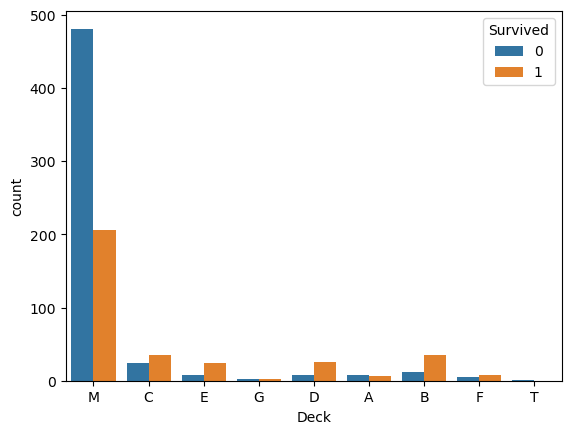

In [386]:
# 시각화로 확인하기
sns.countplot(data = train,
              x = 'Deck',
              hue = 'Survived')

# M에 죽은 사람이 많음
# 생존여부를 파악하는 데 활용해도 괜찮겠군!

In [387]:
# 240417

<Axes: xlabel='Pclass', ylabel='count'>

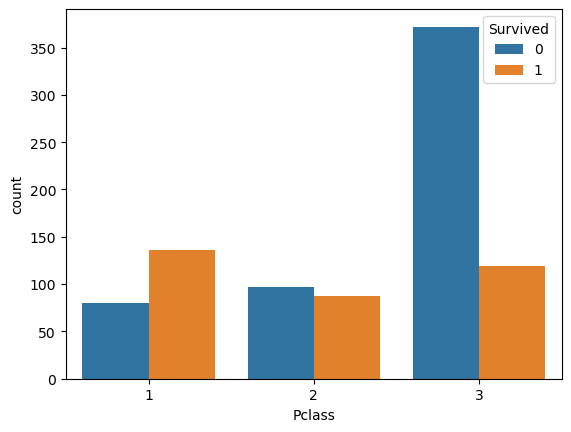

In [388]:
#Pclass에 따른 생존비율 시각화

## 자영풀이
sns.countplot(data = train,
              x = 'Pclass',
              hue = 'Survived')

# 1등급은 생존율이 높음
# 2등급은 생존율이 비슷함
# 3등급은 사망율이 훨씬 높음


<Axes: xlabel='Pclass', ylabel='count'>

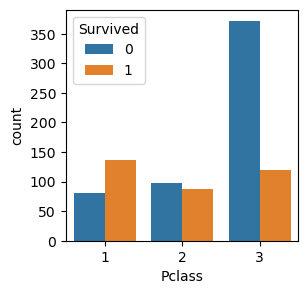

In [389]:
#Pclass에 따른 생존비율 시각화
# 쌤풀이
plt.figure(figsize=(3,3)) #자:그래프 크기 조정

sns.countplot(data = train,
             x = 'Pclass',
             hue = 'Survived')

# 1등급 - 생존율이 높음
# 2등급 - 비교적 사망률이 높음
# 3등급 - 월등히 사망률이 높음

<Axes: xlabel='Deck', ylabel='count'>

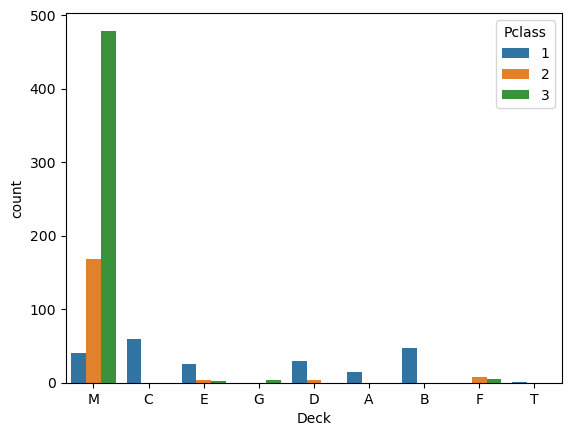

In [390]:
# x : Deck, hue : Pclass
sns.countplot(data = train,
             x = 'Deck',
             hue='Pclass')
# 결측치(M)인 사람이 3등급인 확률이 높구나

<Axes: xlabel='Embarked', ylabel='count'>

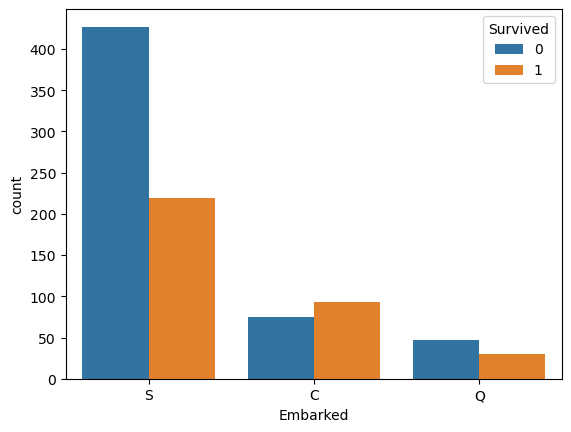

In [391]:
# 탑승 항구에 따른 생존 여부
sns.countplot(data = train,
             x = 'Embarked',
             hue = 'Survived')
# 쌤풀이
# S 항구에서 탑승한 승객이 사망률이 높음
# C 항구 탑승객이 생존률이 높음
# Q 항구 탑승객은 사망률이 비교적 높음


# 자영풀이
# S에서 승선한 사람들은 사망률이 월등히 높음
# C에서 승성한 사람들은 비교적 생존률이 높음
# Q에서 승선한 사람들은 비교적 사망률이 높음


<Axes: xlabel='Sex', ylabel='count'>

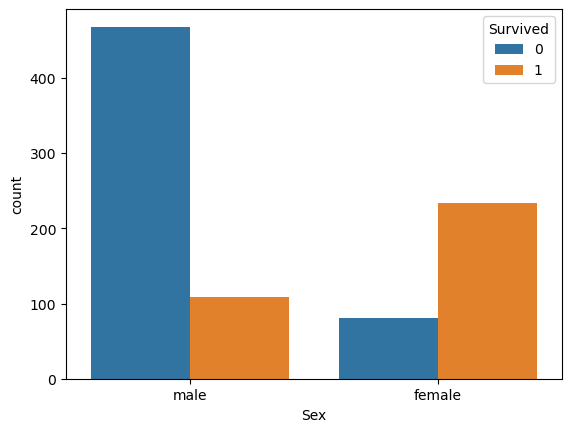

In [392]:
# 성별에 따른 생존 여부
# 해석
sns.countplot(data = train,
             x = 'Sex',
             hue = 'Survived')
# 쌤풀이
# 남자가 많이 사망했구나 ㅠㅠ

# 자영풀이
# 남성의 사망률이 압도적으로 높음
# 여성의 생존률이 압도적으로 높음

<Axes: xlabel='Age', ylabel='count'>

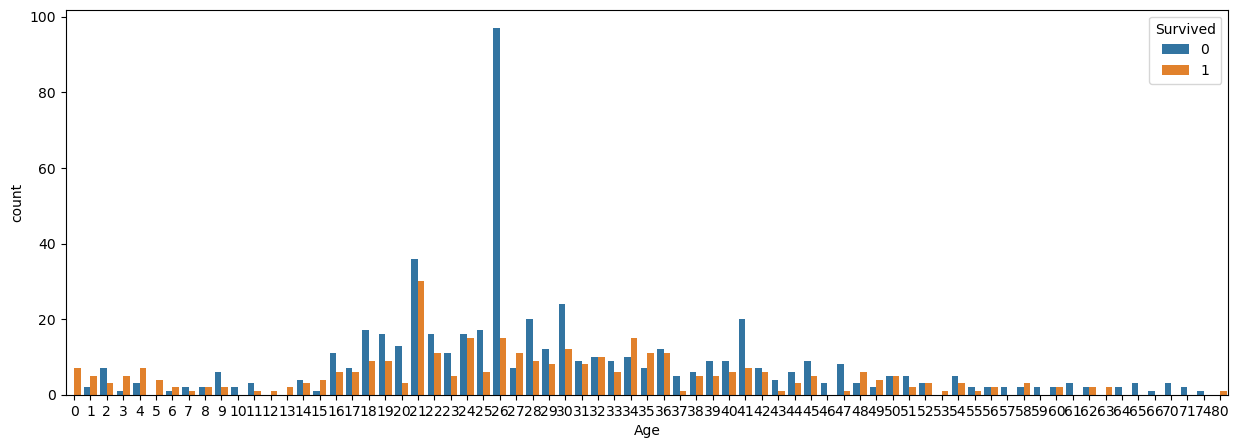

In [393]:
# 나이에 따른 생존여부
# 해석
plt.figure(figsize=(15,5)) #자:그래프 크기 조정

sns.countplot(data = train,
             x = 'Age',
             hue = 'Survived')

# 쌤풀이
# 연속적인 수치형 데이터를 확인할 때 막대 그래프로 그리면 큰 의미가 없게 된다
# 수치형의 데이터는 분포, 밀도를 확인할 수 있는 그래프로 표현



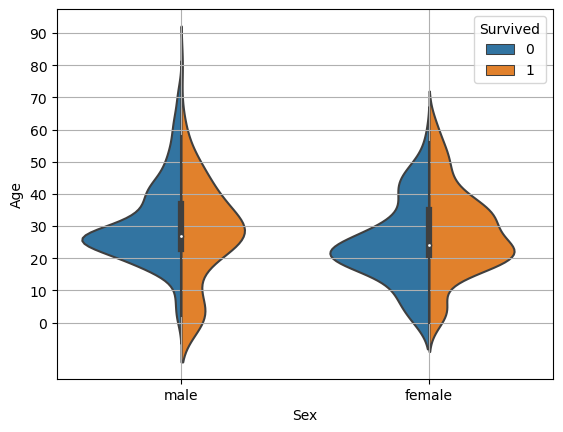

In [394]:
# 바이올린 플롯 : 바이올린 형태로 데이터의 분포와  밀도를 보기 쉽게 곡선으로 표현
# 데이터가 많을수록 두껍게 표현, 적을수록 얇게 표현
sns.violinplot(data = train, 
              x = 'Sex',
              y = 'Age',
              hue = 'Survived',
              split = True)

plt.yticks(range(0,100,10)) #자 : y축 
plt.grid() # 자 : 배경에 격자무늬 추가

# 20대부터 40대 까지의 분포 넓음 -> 탑승자가 많음
# 20대부터 40대 사망자가 많음
# 어린아이들 중에서는 남자아이가 여자 아이보다 생존률이 높음


In [395]:
train.info()
# <class 'pandas.core.frame.DataFrame'>
# Index: 891 entries, 1 to 891
# Data columns (total 11 columns):
#  #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   Survived  891 non-null    int64  
#  1   Pclass    891 non-null    int64  
#  2   Name      891 non-null    object 
#  3   Sex       891 non-null    object 
#  4   Age       891 non-null    int64  
#  5   SibSp     891 non-null    int64  
#  6   Parch     891 non-null    int64  
#  7   Ticket    891 non-null    object 
#  8   Fare      891 non-null    float64
#  9   Embarked  891 non-null    object 
#  10  Deck      891 non-null    object 
# dtypes: float64(1), int64(5), object(5)
# memory usage: 83.5+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


##### 특성공학 : 새로운 컬럼을 생성, 추출
- Parch : 함께 탑승한 부모, 자식의 수
- SibSp : 함께 탑승한 형제, 자매, 배우자의 수
    - 위 두개의 데이터를 보면 동승자 개념 ->비슷한 데이터
    - 부모, 자식, 형제, 자매, 배우자를 합쳐서 "가족의 수" 컬럼 생성
    - train, test 둘 다 생성

In [396]:
train['Parch']
# PassengerId
# 1      0
# 2      0
# 3      0
# 4      0
# 5      0
#       ..
# 887    0
# 888    0
# 889    2
# 890    0
# 891    0
# Name: Parch, Length: 891, dtype: int64

PassengerId
1      0
2      0
3      0
4      0
5      0
      ..
887    0
888    0
889    2
890    0
891    0
Name: Parch, Length: 891, dtype: int64

In [397]:
train['SibSp']
# PassengerId
# 1      1
# 2      1
# 3      0
# 4      1
# 5      0
#       ..
# 887    0
# 888    0
# 889    1
# 890    0
# 891    0
# Name: SibSp, Length: 891, dtype: int64

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    1
890    0
891    0
Name: SibSp, Length: 891, dtype: int64

In [398]:
# 두 개의 컬럼을 합해서 가족의 숫자라는 새로운 컬럼을 생성
train['Family_size'] = train['SibSp'] + train['Parch'] + 1 #자기자신의 수 더해줌
test['Family_size'] = test['SibSp'] + test['Parch'] + 1 #자기자신의 수 더해줌


<Axes: xlabel='Family_size', ylabel='count'>

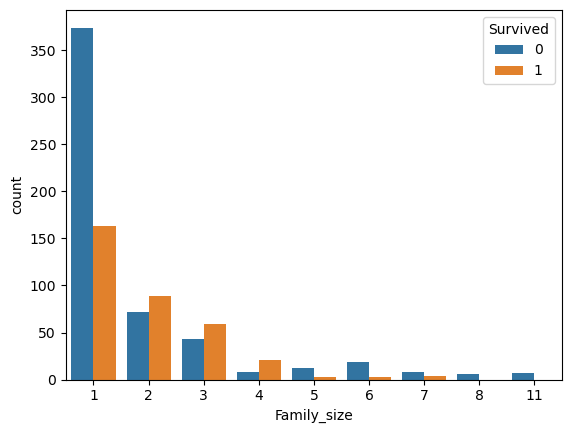

In [399]:
# 시각화
sns.countplot(data = train,
             x = 'Family_size',
             hue = 'Survived')
# 연속적인 데이터의 경우 패턴이 비슷한 데이터들끼리 묶어주어 
# 사소한 관찰의 오류를 줄여주자! -> 학습의 효율성 높여줌


In [400]:
# 연속형 -> 범주화 (binning)
# 데이터, 범위, 각 범위의 라벨

# 범위(나누는 구간설정) 1 ,  2~4, 5~11 총 3개의 구간
bins = [0,1,4,11] # 자: 리스트형태로 데이터 나눔! #첫번째 숫자는 0 #0부터 1까지(1 only) #2부터 4까지 #5부터 11까지

# 라벨
labels = ['Alone', 'Small', 'Large']

train['Family_size']=pd.cut(train['Family_size'], bins = bins, labels = labels)

test['Family_size']=pd.cut(test['Family_size'], bins = bins, labels = labels)



<Axes: xlabel='Family_size', ylabel='count'>

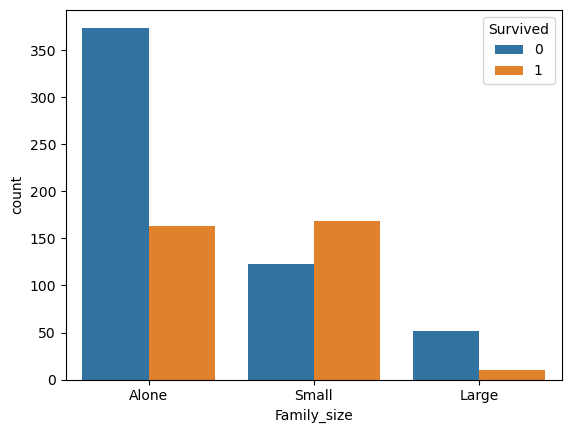

In [401]:
#그룹화된 Family_size 시각화

sns.countplot(data = train,
             x = 'Family_size',
             hue = 'Survived')
# 같은 패턴의 데이터들을 그룹화하여 진행 시 사소한 관찰의 오류를 줄일 수 있다

#자영풀이
# 혼자온 사람은 사망률이 월등히 높다
# 핵가족은 생존율이 더 높다
# 대가족은 사망률이 압도적으로 높다

In [402]:
train.info()
# <class 'pandas.core.frame.DataFrame'>
# Index: 891 entries, 1 to 891
# Data columns (total 12 columns):
#  #   Column       Non-Null Count  Dtype   
# ---  ------       --------------  -----   
#  0   Survived     891 non-null    int64   
#  1   Pclass       891 non-null    int64   
#  2   Name         891 non-null    object  
#  3   Sex          891 non-null    object  
#  4   Age          891 non-null    int64   
#  5   SibSp        891 non-null    int64   
#  6   Parch        891 non-null    int64   
#  7   Ticket       891 non-null    object  
#  8   Fare         891 non-null    float64 
#  9   Embarked     891 non-null    object  
#  10  Deck         891 non-null    object  
#  11  Family_size  891 non-null    category
# dtypes: category(1), float64(1), int64(5), object(5)
# memory usage: 84.5+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          891 non-null    int64   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  Deck         891 non-null    object  
 11  Family_size  891 non-null    category
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 84.5+ KB


- Name 데이터 확인

In [403]:
train['Name']
# text 데이터 내에서 규착찾기 -> 호칭 추출


# PassengerId
# 1                                Braund, Mr. Owen Harris
# 2      Cumings, Mrs. John Bradley (Florence Briggs Th...
# 3                                 Heikkinen, Miss. Laina
# 4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
# 5                               Allen, Mr. William Henry
#                              ...                        
# 887                                Montvila, Rev. Juozas
# 888                         Graham, Miss. Margaret Edith
# 889             Johnston, Miss. Catherine Helen "Carrie"
# 890                                Behr, Mr. Karl Howell
# 891                                  Dooley, Mr. Patrick
# Name: Name, Length: 891, dtype: object

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [404]:
# 첫번째 승객의 이름만 추출해서 확인
train['Name'][1] # 'Braund, Mr. Owen Harris'
# 이름, 호칭.성 -> 호칭추출

'Braund, Mr. Owen Harris'

In [405]:
# split(기준이 되는 값) -> 잘라서 리스트로 출력
train['Name'][1].split(",") #['Braund', ' Mr. Owen Harris']


['Braund', ' Mr. Owen Harris']

In [406]:
# 1번 인덱스의 데이터만 추출
train['Name'][1].split(",")[1] #' Mr. Owen Harris'

' Mr. Owen Harris'

In [407]:
# . 을 기준으로 분할
train['Name'][1].split(",")[1].split(".") # [' Mr', ' Owen Harris']

[' Mr', ' Owen Harris']

In [408]:
# 호칭만을 추출하기 위해 0번 인덱스만 추출
train['Name'][1].split(",")[1].split(".")[0] # ' Mr'

' Mr'

In [409]:
# 문자열에서 공백 제거 : strip()
train['Name'][1].split(",")[1].split(".")[0].strip() # 'Mr'

'Mr'

In [410]:
# 위 작업을 함수화
def split_name (data):
    return data.split(",")[1].split(".")[0].strip() 
    

In [411]:
# Title 새로운 컬럼을 생성 (호칭만을 추출하여 대입)

#자영풀이

# title = []
# for i in range(1,892):
#     title.append(split_name(train['Name'][i]))

# train['Title2'] = title
# train['Title2']

In [412]:
# Title 새로운 컬럼을 생성 (호칭만을 추출하여 대입)
# 쌤풀이
train['Title']=train['Name'].apply(split_name)
test['Title']=test['Name'].apply(split_name)
# 자: 시리즈는  1차원이라서 축설정 필요없음

In [413]:
train['Title'].unique()

# array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
#        'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
#        'Jonkheer'], dtype=object)

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [414]:
len(train['Title'].unique()) # 17

17

In [415]:
test['Title'].unique()

# array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
#       dtype=object)

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

(0.0, 10.0)

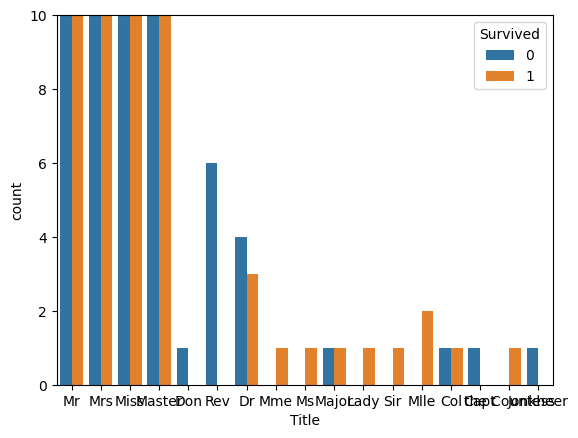

In [416]:
# Title 시각화

sns.countplot(data = train,
             x= 'Title',
             hue= 'Survived')

plt.ylim(0,10) # 차트 출력의 범위 제한

# 개수가 적은 특징들을 others 라는 그룹으로 묶어주기
# Rev(목사님)->특정패턴을 모임 전원 사망
    ## 자: 목사님은 제외하고 others 로 묶자!

In [417]:
# map 함수 사용을 위해서 각 호칭에 대응하는 딕셔너리를 생성
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Don', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']
convert_title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Others'] * 12

convert_title

#['Mr',
#  'Mrs',
#  'Miss',
#  'Master',
#  'Rev',
#  'Others',
#  'Others',
#  'Others',
#  'Others',
#  'Others',
#  'Others',
#  'Others',
#  'Others',
#  'Others',
#  'Others',
#  'Others',
#  'Others']

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others']

In [418]:
# zip() 함수를 사용해서 2개의 리스트형태 데이터를 연결하여 딕셔너리로 생성
# zip(): 지퍼처럼 두 개의 그룹 데이터를 서로 엮어주는 함수
title_dic = dict(zip(title, convert_title))
# {'Mr': 'Mr',
#  'Mrs': 'Mrs',
#  'Miss': 'Miss',
#  'Master': 'Master',
#  'Rev': 'Rev',
#  'Don': 'Others',
#  'Dr': 'Others',
#  'Mme': 'Others',
#  'Ms': 'Others',
#  'Major': 'Others',
#  'Lady': 'Others',
#  'Sir': 'Others',
#  'Mlle': 'Others',
#  'Col': 'Others',
#  'Capt': 'Others',
#  'the Countess': 'Others',
#  'Jonkheer': 'Others'}

In [419]:
# map() 함수를 사용하여 key 값에 대응하는 vlaue 값으로 변경
train['Title']=train['Title'].map(title_dic)
# PassengerId
# 1        Mr
# 2       Mrs
# 3      Miss
# 4       Mrs
# 5        Mr
#        ... 
# 887     Rev
# 888    Miss
# 889    Miss
# 890      Mr
# 891      Mr
# Name: Title, Length: 891, dtype: object


In [420]:
# 잘바뀌었는지 확인
train['Title'].unique()
#array(['Mr', 'Mrs', 'Miss', 'Master', nan, 'Rev'], dtype=object)

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Rev'], dtype=object)

In [421]:
# test 변경
# 자영 풀이 (왜 Nan이 나올까?)
# len(test['Title'].unique()) #9
title2 = ['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Rev', 'Col',  'Dr', 'Dona']
convert_title2 = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Others'] * 4
# len(convert_title2)

title_dic2 = dict(zip(title2, convert_title2))

# test['Title'] = test['Title'].map(title_dic2)
# test['Title']


# PassengerId
# 892         Mr
# 893        Mrs
# 894         Mr
# 895         Mr
# 896        Mrs
#          ...  
# 1305        Mr
# 1306       NaN
# 1307        Mr
# 1308        Mr
# 1309    Master
# Name: Title, Length: 418, dtype: object

In [422]:
# 쌤풀이
test['Title'] = test['Title'].map(title_dic)

In [423]:
#확인
test['Title'].unique()
# train에는 없지만 test에는 존재하는 호칭이 있구나!
# 어떤 호칭일까?

# array(['Mr', 'Mrs', 'Miss', 'Master', nan], dtype=object)


array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Rev', nan], dtype=object)

In [424]:
title_train = title
title_test = ['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona']
title_train

#['Mr',
#  'Mrs',
#  'Miss',
#  'Master',
#  'Rev',
#  'Don',
#  'Dr',
#  'Mme',
#  'Ms',
#  'Major',
#  'Lady',
#  'Sir',
#  'Mlle',
#  'Col',
#  'Capt',
#  'the Countess',
#  'Jonkheer']

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Don',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer']

In [425]:
# test에는 있지만 train에는 없는 호칭을 찾기

#set(title_test)
#{'Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'}

set(title_test) - set(title_train) #{'Dona'}
# Dona


{'Dona'}

In [426]:
# train에는 있지만 test 에는 없는 호칭
set(title_train) - set(title_test)

# {'Capt',
#  'Don',
#  'Jonkheer',
#  'Lady',
#  'Major',
#  'Mlle',
#  'Mme',
#  'Sir',
#  'the Countess'}

{'Capt',
 'Don',
 'Jonkheer',
 'Lady',
 'Major',
 'Mlle',
 'Mme',
 'Sir',
 'the Countess'}

In [427]:
# 딕셔너리에 Dona 라는 값 Ohter 연결
title_dic['Dona'] = 'Others'
title_dic

# {'Mr': 'Mr',
#  'Mrs': 'Mrs',
#  'Miss': 'Miss',
#  'Master': 'Master',
#  'Rev': 'Rev',
#  'Don': 'Others',
#  'Dr': 'Others',
#  'Mme': 'Others',
#  'Ms': 'Others',
#  'Major': 'Others',
#  'Lady': 'Others',
#  'Sir': 'Others',
#  'Mlle': 'Others',
#  'Col': 'Others',
#  'Capt': 'Others',
#  'the Countess': 'Others',
#  'Jonkheer': 'Others',
#  'Dona': 'Others'}

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Others',
 'Dr': 'Others',
 'Mme': 'Others',
 'Ms': 'Others',
 'Major': 'Others',
 'Lady': 'Others',
 'Sir': 'Others',
 'Mlle': 'Others',
 'Col': 'Others',
 'Capt': 'Others',
 'the Countess': 'Others',
 'Jonkheer': 'Others',
 'Dona': 'Others'}

In [428]:
test['Title'].map(title_dic)

# PassengerId
# 892         Mr
# 893        Mrs
# 894         Mr
# 895         Mr
# 896        Mrs
#          ...  
# 1305        Mr
# 1306       NaN
# 1307        Mr
# 1308        Mr
# 1309    Master
# Name: Title, Length: 418, dtype: object

PassengerId
892         Mr
893        Mrs
894         Mr
895         Mr
896        Mrs
         ...  
1305        Mr
1306       NaN
1307        Mr
1308        Mr
1309    Master
Name: Title, Length: 418, dtype: object

In [429]:
test['Title'] = test['Title'].fillna("Others")

In [430]:
test['Title'].unique()
#array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)


array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Rev'], dtype=object)

<Axes: xlabel='Title', ylabel='count'>

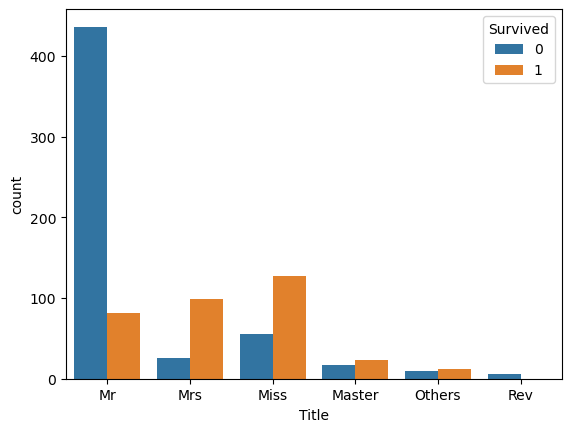

In [431]:
sns.countplot(data = train,
             x= 'Title',
             hue = 'Survived')

In [432]:
# Ticket 컬럼 확인
train['Ticket'].unique()
# 티켓번호 -> 규칙찾기 실패 -> 컬럼 제거

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

##### 필요없는 컬럼 삭제
- Name, SibSp, Parch, Ticket

In [433]:
train.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis = 1, inplace=True)
test.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis = 1, inplace=True)

In [434]:
# 데이터 크기
print(train.shape) #(891, 9)
print(test.shape) #(418, 8)

(891, 9)
(418, 8)


### 모델링
- 데이터 분리
- 모델 선택
- 모델 학습
- 모델 예측
- 모델 평가

- 데이터 분리
    - train -> 문제, 정답
        - 문제(X_train): 특성 8개
        - 정답(y_train) :Survived 컬럼
    - test -> 문제
        - X_test

In [435]:
# 분리
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test

In [436]:
# 크기 확인
print(X_train.shape, y_train.shape) # (891, 8) (891,)
print(X_test.shape) #(418, 8)

(891, 8) (891,)
(418, 8)


In [437]:
# 원핫인코딩! #자: 문자열->수치화 #문자열 개수만큼 컬럼 수 늘려줌
# (train, test)
onehot_X_train = pd.get_dummies(X_train)
onehot_X_test = pd.get_dummies(X_test)

In [438]:
# 크기확인
print(onehot_X_train.shape) # (891, 26)
print(onehot_X_test.shape) #(418, 25)

(891, 26)
(418, 25)


In [439]:
#자영
set(onehot_X_train)
set(onehot_X_test)

{'Age',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_M',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Family_size_Alone',
 'Family_size_Large',
 'Family_size_Small',
 'Fare',
 'Pclass',
 'Sex_female',
 'Sex_male',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Others',
 'Title_Rev'}

In [440]:
# set() 함수를 활용하여 다른 컬럼을 확인
set(onehot_X_train.columns) - set(onehot_X_test.columns) #{'Deck_T'}
# Deck_T 컬럼이 train 에만 존재하는 것을 확인
# train['Deck'] 컬럼에만 T 라는 알파벳이 있었기 때문

{'Deck_T'}

In [441]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Sex          891 non-null    object  
 3   Age          891 non-null    int64   
 4   Fare         891 non-null    float64 
 5   Embarked     891 non-null    object  
 6   Deck         891 non-null    object  
 7   Family_size  891 non-null    category
 8   Title        891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 95.9+ KB


In [442]:
# 240418 목

In [444]:
# 기계학습을 위해서 X_train과 X_test의 컬럼수와 순서를 맞춰주어야 한다!
onehot_X_train.columns
# Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
#        'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
#        'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_size_Alone',
#        'Family_size_Small', 'Family_size_Large', 'Title_Master', 'Title_Miss',
#        'Title_Mr', 'Title_Mrs', 'Title_Others', 'Title_Rev'],
#       dtype='object')

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_size_Alone',
       'Family_size_Small', 'Family_size_Large', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Others', 'Title_Rev'],
      dtype='object')

In [445]:
onehot_X_test.columns
# Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
#        'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
#        'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_size_Alone',
#        'Family_size_Small', 'Family_size_Large', 'Title_Master', 'Title_Miss',
#        'Title_Mr', 'Title_Mrs', 'Title_Others', 'Title_Rev'],
#       dtype='object')

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_size_Alone',
       'Family_size_Small', 'Family_size_Large', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Others', 'Title_Rev'],
      dtype='object')

In [446]:
# Deck_T 컬럼은 생기지만 실제로 데이터는 없는 경우(원핫인코딩)
onehot_X_test['Deck_T'] = 0

In [447]:
onehot_X_test.columns
# Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
#        'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
#        'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_size_Alone',
#        'Family_size_Small', 'Family_size_Large', 'Title_Master', 'Title_Miss',
#        'Title_Mr', 'Title_Mrs', 'Title_Others', 'Title_Rev', 'Deck_T'],
#       dtype='object')

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_size_Alone',
       'Family_size_Small', 'Family_size_Large', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Others', 'Title_Rev', 'Deck_T'],
      dtype='object')

In [448]:
# onehot_X_train 에 있는 Deck_T 컬럼을 제일 뒤로 보내주기!

In [449]:
# 1. Deck_T 임시변수에 저장하기~
tmp = onehot_X_train['Deck_T']
# PassengerId
# 1      False
# 2      False
# 3      False
# 4      False
# 5      False
#        ...  
# 887    False
# 888    False
# 889    False
# 890    False
# 891    False
# Name: Deck_T, Length: 891, dtype: bool

In [450]:
# 2. onehot_X_train 에서 Deck_T 삭제
# 쌤풀이
onehot_X_train.drop('Deck_T', inplace = True, axis = 1)

In [451]:
# 3. onehot_X_train에 제일 뒤로 tmp 데이터를 병합 (concat -> 축설정)

# 쌤풀이
onehot_X_train = pd.concat([onehot_X_train, tmp], axis=1)
onehot_X_train.columns

# Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
#        'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
#        'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_size_Alone',
#        'Family_size_Small', 'Family_size_Large', 'Title_Master', 'Title_Miss',
#        'Title_Mr', 'Title_Mrs', 'Title_Others', 'Title_Rev', 'Deck_T'],
#       dtype='object')


#자영풀이
# newDf = pd.concat([onehot_X_train, tmp], axis=1)
# newDf.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_size_Alone',
       'Family_size_Small', 'Family_size_Large', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Others', 'Title_Rev', 'Deck_T'],
      dtype='object')

### 모델링
- knn 모델
- tree 모델

- knn_model1 (하이퍼파라미터를 조절하지 않은 모델)

In [452]:
# 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier # KNN 분류 라이브러리
from sklearn.tree import DecisionTreeClassifier # 의사결정나무 분류모델

from sklearn.model_selection import cross_val_score # 교차검증 도구

In [453]:
# 1. 모델 객체 생성 (knn_model1)
knn_model1 = KNeighborsClassifier()

In [454]:
# 2. 모델학습
# mode.fit(훈려용 문제, 훈련용 정답)
knn_model1.fit(onehot_X_train, y_train)

KNeighborsClassifier()

In [455]:
# 2-1. 교차검증 # cross_val_score (모델이름, 문제, 정답, 교차검증횟수)
cross_val_score(knn_model1, onehot_X_train.values, y_train, cv= 5).mean()
# 평균 0.71 의 성능을 내는 모델

0.7104764296026616

In [456]:
onehot_X_test.shape

(418, 26)

In [457]:
onehot_X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_size_Alone',
       'Family_size_Small', 'Family_size_Large', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Others', 'Title_Rev', 'Deck_T'],
      dtype='object')

In [458]:
# 3. 모델 예측
# model.predict(테스트용 문제)
pre1 = knn_model1.predict(onehot_X_test.values)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [459]:
# 4. kaggle 제출을 위하여 정답 작성
# gender_submission 파일 불러오기
result_submission = pd.read_csv('data/gender_submission.csv')
result_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [460]:
# 5.우리가 예측한 정답 덮어 씌워주기!
result_submission['Survived'] = pre1
result_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [462]:
# 6. 제출을 위하여 csv 파일 형태로 내보내기!
result_submission.to_csv('data/kaggle_sub_01.csv', index = False) # 자: 인덱스 제거해서 보내야함


tree_model1 (하이퍼파라미터를 조절하지 않은 모델)

In [463]:
# 1. 모델 객체 생성 (tree_model1)
tree_model1 = DecisionTreeClassifier()

In [1104]:
# 2. 모델학습
tree_model1.fit(onehot_X_train, y_train)

DecisionTreeClassifier()

In [1114]:
# 2-1. 교차검증
cross_val_score(tree_model1, onehot_X_train, y_train, cv = 7).mean()
# knn 모델보다는 성능이 조금 더 좋은 것을 확인
# 약 79% 정확도를 보이는 것을 확인

0.7935795134983127

In [515]:
# 3. 모델 예측
tree_model1.predict(onehot_X_test.values)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

- tree_model(하이퍼파라미터를 조절한 모델) ->제출

In [1120]:
#객체 생성, 학습, 교차검증
tree_model2 = DecisionTreeClassifier(max_depth=3)
tree_model2.fit(onehot_X_train, y_train)
cross_val_score(tree_model2, onehot_X_train, y_train, cv = 5).mean()
# 하이퍼파라미터 조절 후 정확도가 향상된 것을 확인

0.8159249262444291

In [1121]:
# 예측 후 제출

# 3. 모델 예측
# 쌤풀이
pre2 = tree_model2.predict(onehot_X_test.values)

# 4.
result_submission2 = pd.read_csv('data/gender_submission.csv')
result_submission2['Suvived']=pre2
result_submission2.to_csv('data/kaggle_02.csv', index=False)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


- 자영풀이


In [861]:
tree_model21 = DecisionTreeClassifier(max_depth=4,
                                     max_leaf_nodes=11,
                                     min_samples_split=8,
                                     min_samples_leaf=4
                                    )
cross_val_score(tree_model21, onehot_X_train, y_train, cv = 5).mean()

0.8237712635741635

In [1125]:
#제출
tree_model31 = DecisionTreeClassifier(max_depth=4,
                                      max_leaf_nodes=10,
                                     min_samples_split=15,
                                     min_samples_leaf=4
                                     
                                    )

tree_model31.fit(onehot_X_train, y_train)
print(cross_val_score(tree_model31, onehot_X_train, y_train, cv = 5).mean())


# 5.우리가 예측한 정답 덮어 씌워주기!
pre_tree_31 = tree_model31.predict(onehot_X_test.values)

result_submission['Survived'] = pre_tree_31
result_submission

result_submission.to_csv('data/kaggle_sub_31.csv', index = False) # 자: 인덱스 제거해서 보내야함


0.8237712635741635


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### 모델 성능개선
- 데이터의 양 늘리기
- 전처리 방법 수정
- 더 좋은 성능을 가지는 모델 사용
- 하이퍼파라미터 조절 (약 5% 정도의 변화)
- 정규화, 숫자값의 범위 조정(scale 조정) 
    - 거리 계산에 민감한 knn 모델의 성능을 높이기 위해서 스케일 조정을 해줌
    - sklearn 스케일링 도구 제공 -> 사용법 확인

In [1127]:
# sklearn 에서 제공하는 scale 도구 불러오기!
from sklearn.preprocessing import StandardScaler

In [1128]:
# 스케일러 객체 생성
scaler = StandardScaler()

In [1130]:
# 스케일러 학습(문제 데이터)
scaler.fit(onehot_X_train)

StandardScaler()

In [1132]:
# 학습한 스케일러가 데이터의 범위를 변환
t_X_train = scaler.transform(onehot_X_train)
# 스케일링한 우리의 문제 데이터

In [1134]:
# test 데이터도 변환
t_X_test = scaler.transform(onehot_X_test)

In [1140]:
# 스케일링해준 데이터로 교차 검증
cross_val_score(knn_model1, t_X_train, y_train, cv = 5).mean()
# 약 80.9% 정도의 정확도 출력
# 스케일링 전보다 약 10% 정도의 정확도가 상승됨

0.809189630280585

### 앙상블 모델링
- 여러 개의 모델을 결합하여 더욱 강력한 모델을 만드는 기법


- Voting (보팅)
    - 여러 개의 서로 '다른' 모델이 예측한 결과를 투표하는 방식
        - hard Voting : 클래스를 예측 → 다수결
        - soft Voting : 클래스별 확률 출력 → 확률의 평균
- Bagging (배깅)
    - 여러 개의 서로 '같은' 모델이 예측한 결과를 투표하는 방식
    - ex.RandomForest(랜덤포레스트) : 의사결정 나무 기반
- Boosting (부스팅)
    - 여러 개의 서로 '같은' 모델이 '연속적, 순차적' 학습을 진행-> 이전 학습 내용을 반영하여 이후 학습에 오류를 개선해나가는 방식

In [1154]:
# 모델 불러오기
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


1. voting

In [1146]:
# voting 모델 객체 생성
voting_model = VotingClassifier(estimators=[('knn1', knn_model1),
                            ('tree1', tree_model1),
                            ('tree2', tree_model2)],
                            voting='soft')

In [1155]:
# 교차검증
cross_val_score(voting_model, onehot_X_train.values, y_train, cv=5).mean()
#0.812560416797439

0.8181846713953927

2. bagging

In [1170]:
# bagging 모델 객체 생성
forest_model = RandomForestClassifier()
cross_val_score(forest_model, onehot_X_train, y_train, cv=5).mean()
#0.8013307388111229

0.809189630280585

In [1175]:
# RandomForest 모델 하이퍼파라미터 조절
forest_model2 = RandomForestClassifier(n_estimators=100, # n_estimators : 숲을 구성하는 나무의 개수
                                       max_depth=3) 
cross_val_score(forest_model2, onehot_X_train, y_train, cv=5).mean()


0.8170359676103196

In [1387]:
# 자영
forest_model3 = RandomForestClassifier(n_estimators=100,
                                       max_depth=6,
                                       max_leaf_nodes=5
                                       ) 
cross_val_score(forest_model2, onehot_X_train, y_train, cv=5).mean()


0.8114179900822297

In [1385]:
# 자영학습 예측
forest_model3.fit(onehot_X_train, y_train)
pre_forest3 = forest_model3.predict(onehot_X_test)

# 자영 정답제출

result_submission['Survived'] = pre_forest3
result_submission

result_submission.to_csv('data/kaggle_pre_forest3.csv', index = False) # 자: 인덱스 제거해서 보내야함


3. Adaboost

In [1389]:
# Adaboost 모델 객체 생성
ada_model = AdaBoostClassifier()
cross_val_score(ada_model, onehot_X_train, y_train, cv=5).mean()
#0.8170673529596384

0.8170673529596384

### GridSerchCV를 적용하여 모델의 성능 향상시키기
- 최적의 하이퍼파라미터를 찾아주는 도구

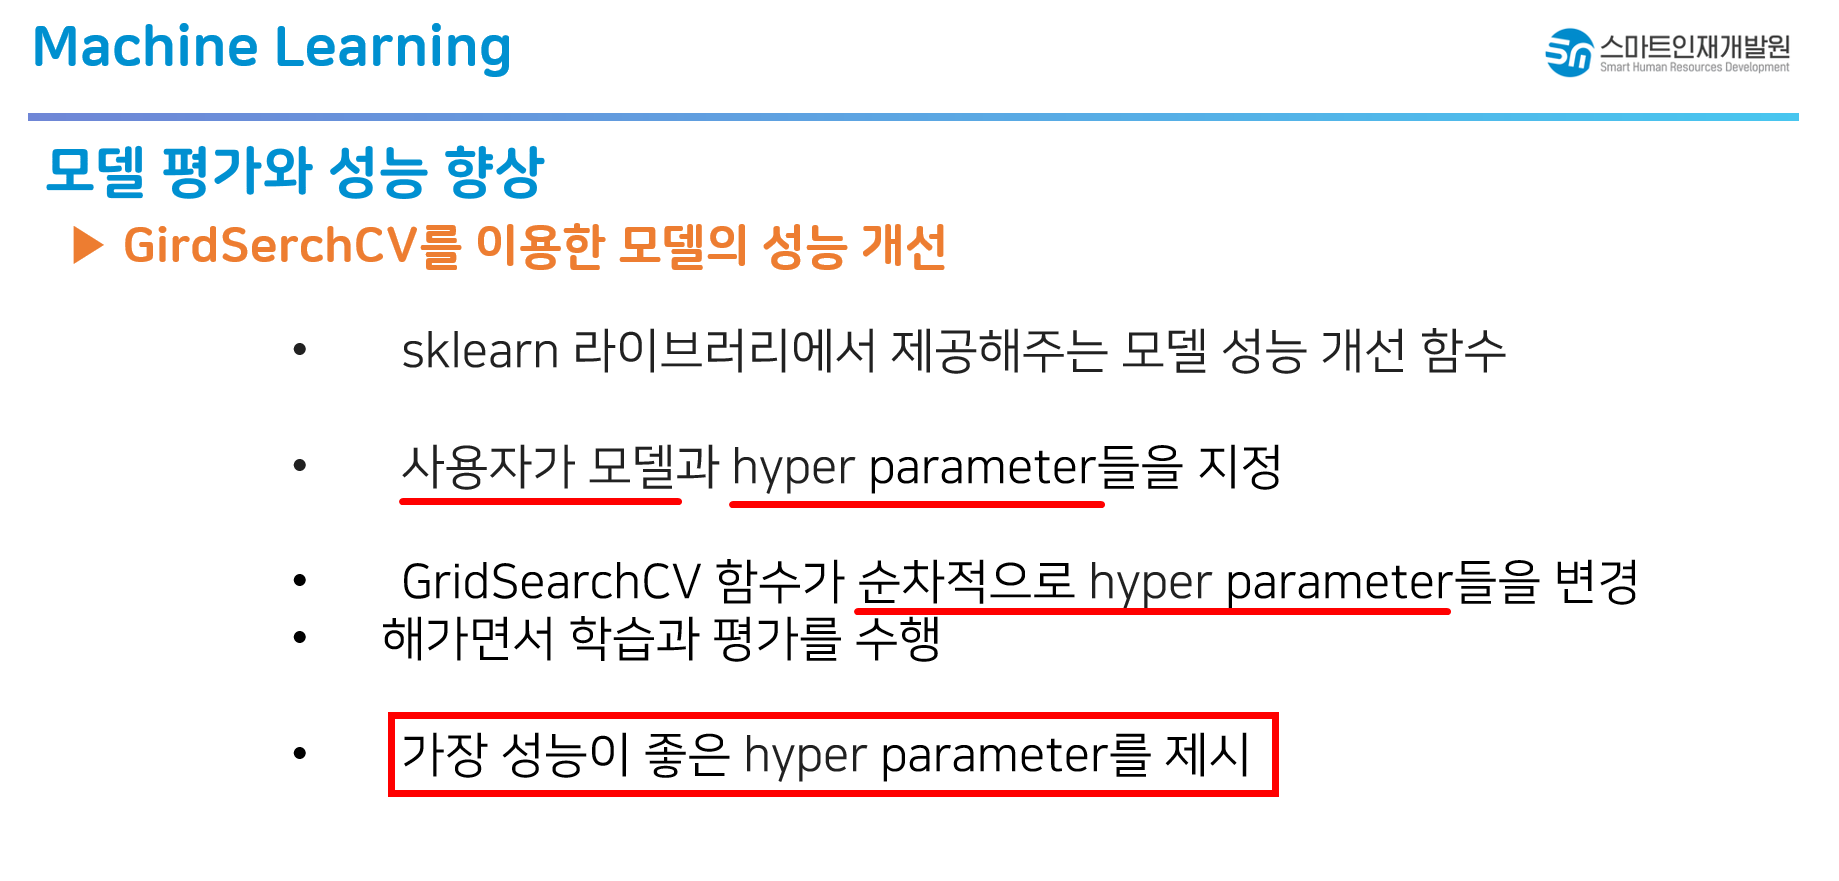

In [1390]:
# 그리드서치 도구 불러오기~
from sklearn.model_selection import GridSearchCV # 자: CV = cross validation
# 교차검증을 하면서 그리드 서치를 진행 -> 최적화된 하이퍼파라미터를 찾는다

In [1399]:
#1. 하이퍼 파라미터들의 경우의 수를 지정
params = {'n_estimators':[50,100,200],
          'max_depth' : [3,5,7],
          'max_leaf_nodes' : [2,4,6],
          'min_samples_split' : [3,5,7]}

# 2. 대상 모델 선정
model = RandomForestClassifier(random_state=18)

#3. 대상 모델에게 그리드서치 적용하기
grid = GridSearchCV(model, params, cv=5, scoring='accuracy')


# 4. 적용 (자: 문제, 정답으로 학습)
grid.fit(onehot_X_train,y_train)
# 경우의 수가 많을수록 시간 오래걸림

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=18),
             param_grid={'max_depth': [3, 5, 7], 'max_leaf_nodes': [2, 4, 6],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [1402]:
# 베스트 파라미터 확인
print('최적의 하이퍼 파라미터', grid.best_params_) # 최적의 하이퍼 파라미터 {'max_depth': 5, 'max_leaf_nodes': 6, 'min_samples_split': 3, 'n_estimators': 200}

print("최적의 정확도 : ", grid.best_score_) # 최적의 정확도 :  0.8192831586215554


최적의 하이퍼 파라미터 {'max_depth': 5, 'max_leaf_nodes': 6, 'min_samples_split': 3, 'n_estimators': 200}
최적의 정확도 :  0.8192831586215554


In [1404]:
# 최적의 하이퍼파라미터 조합으로 다시 모델링
# 모델 객체생성 -> 하이퍼파라미터 조절
# 모델 학습
# 모델 예측
# 제출

In [1408]:
# 자영
# 최적의 하이퍼파라미터 조합으로 다시 모델링

# 모델 객체생성 -> 하이퍼파라미터 조절
forest_model_best = RandomForestClassifier(n_estimators=200,
                                       max_depth=5,
                                       max_leaf_nodes=6,
                                       min_samples_split = 3) 
print(cross_val_score(forest_model_best, onehot_X_train, y_train, cv=5).mean())
# 모델 학습
forest_model_best.fit(onehot_X_train, y_train)

# 모델 예측
pre_forest_best = forest_model_best.predict(onehot_X_test)


0.8170359676103194


In [1410]:
# #자영
# # 제출
# result_submission2 = pd.read_csv('data/gender_submission.csv') # 정답지 가져오기
# result_submission['Survived'] = pre_forest_best
# result_submission

# result_submission.to_csv('data/kaggle_pre_forest_best.csv', index = False) # 자: 인덱스 제거해서 보내야함


In [1411]:
# 쌤풀이
# 최적의 하이퍼파라미터 조합으로 다시 모델링
# 모델객체생성 -> 하이퍼파라미터조절
rf_model = RandomForestClassifier(n_estimators=200,
                                  max_depth=5,
                                  max_leaf_nodes=6,
                                  min_samples_split=3)
# 모델학습
rf_model.fit(onehot_X_train,y_train)
# 모델예측
rf_model.predict(onehot_X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [1426]:
sum = 0
for i in range(1,4):
    e = ((0.5 * i) - (1*i))**2 
    print(i, '번째 오차 제곱', e)
    sum = sum + e
print('error sum: ', sum)    
print('mse : ',sum / 3) #0.75

1 번째 오차 제곱 0.25
2 번째 오차 제곱 1.0
3 번째 오차 제곱 2.25
error sum:  3.5
mse :  1.1666666666666667
